## Importing libraries

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score , classification_report
import cv2
import pickle as pk
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', 785)
pd.set_option('display.max_rows', 100)

## Loading dataset

In [3]:
df_train = pd.read_csv('Data/train.csv' , header=None)
char_map = pd.read_csv('Data/mappings.txt' , delimiter=' ', header=None , index_col=0 , squeeze=True)

In [4]:
label_dictionary = {}
for index, label in enumerate(char_map):
    label_dictionary[index] = chr(label)

In [4]:
label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

### functions

In [ ]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [143]:
def compare_2_arrays(arr1,arr2):
    arr_1 = np.array(0)
    arr_2 = np.array(0)
    for i in range(len(arr1)):
        if arr1[i] == arr2[i]:
            pass
        else:
            arr_1 = np.append(arr_1 , label_dictionary[arr1[i]])
            arr_2 = np.append(arr_2 , label_dictionary[arr2[i]])
            
    return arr_1[1:] , arr_2[1:]

## Exploring data

In [6]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,32,36,21,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,33,113,124,81,22,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,77,158,243,249,232,159,95,34,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,124,213,254,254,254,247,234,202,154,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,114,203,254,254,254,254,252,242,207,59,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,122,230,245,252,254,254,254,249,207,91,36,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,67,170,204,236,254,254,254,254,244,163,96,33,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,24,45,160,251,254,255,254,254,247,234,190,121,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,67,123,222,254,254,255,255,254,254,254,244,202,32,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,123,195,247,254,254,255,255,255,254,254,243,200,32,0,0,0,0,0,0,0,0,0,0,0,0,0,20,77,220,247,254,254,254,252,251,252,254,252,177,95,7,0,0,0,0,0,0,0,0,0,0,0,0,0,50,139,250,254,254,

In [7]:
df_train.shape

(112800, 785)

### Split X , y

In [8]:
X = df_train.iloc[:,1:]
y = df_train.iloc[:,0]

In [9]:
y.value_counts().sort_index()

0     2400
1     2400
2     2400
3     2400
4     2400
5     2400
6     2400
7     2400
8     2400
9     2400
10    2400
11    2400
12    2400
13    2400
14    2400
15    2400
16    2400
17    2400
18    2400
19    2400
20    2400
21    2400
22    2400
23    2400
24    2400
25    2400
26    2400
27    2400
28    2400
29    2400
30    2400
31    2400
32    2400
33    2400
34    2400
35    2400
36    2400
37    2400
38    2400
39    2400
40    2400
41    2400
42    2400
43    2400
44    2400
45    2400
46    2400
Name: 0, dtype: int64

### rotating each image

In [10]:
X = np.asarray(X)
X = np.apply_along_axis(rotate, 1, X)
print ("X Shape :",X.shape)

X Shape : (112800, 28, 28)


### Try running images

Label  : f


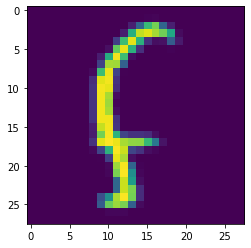

In [11]:
index=9999

print("Label  :" , label_dictionary[(y[index])])

plt.imshow(X[index])

## Splitting data

In [12]:
X = X.reshape((X.shape[0],784))

In [13]:
X_train , X_test , y_train , y_test = train_test_split( X , y ,test_size=0.15 , shuffle= True, random_state = 44)

## Random forest model

In [14]:
rfc = RandomForestClassifier()

In [15]:
parameters = {
    'criterion':["entropy"],
    'max_depth':[33,35],
    'min_samples_leaf':[5],
    'n_estimators': [200],
    'n_jobs':[-1]
             }

In [16]:
clf_rf = GridSearchCV(rfc, parameters, cv=3 , verbose=3)

In [17]:
clf_rf.fit(X_train,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END criterion=entropy, max_depth=33, min_samples_leaf=5, n_estimators=200, n_jobs=-1;, score=0.793 total time= 1.3min
[CV 2/3] END criterion=entropy, max_depth=33, min_samples_leaf=5, n_estimators=200, n_jobs=-1;, score=0.793 total time= 1.4min
[CV 3/3] END criterion=entropy, max_depth=33, min_samples_leaf=5, n_estimators=200, n_jobs=-1;, score=0.786 total time= 1.2min
[CV 1/3] END criterion=entropy, max_depth=35, min_samples_leaf=5, n_estimators=200, n_jobs=-1;, score=0.794 total time= 1.2min
[CV 2/3] END criterion=entropy, max_depth=35, min_samples_leaf=5, n_estimators=200, n_jobs=-1;, score=0.791 total time= 1.2min
[CV 3/3] END criterion=entropy, max_depth=35, min_samples_leaf=5, n_estimators=200, n_jobs=-1;, score=0.786 total time= 1.2min


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [33, 35],
                         'min_samples_leaf': [5], 'n_estimators': [200],
                         'n_jobs': [-1]},
             verbose=3)

In [18]:
y_pred_rf = clf_rf.predict(X_test)

In [19]:
clf_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 33,
 'min_samples_leaf': 5,
 'n_estimators': 200,
 'n_jobs': -1}

In [24]:
f1_score(y_pred_rf,y_test , average='weighted')

0.8084421377622045

In [25]:
accuracy_score(y_pred_rf,y_test)

0.8054964539007092

<AxesSubplot:>

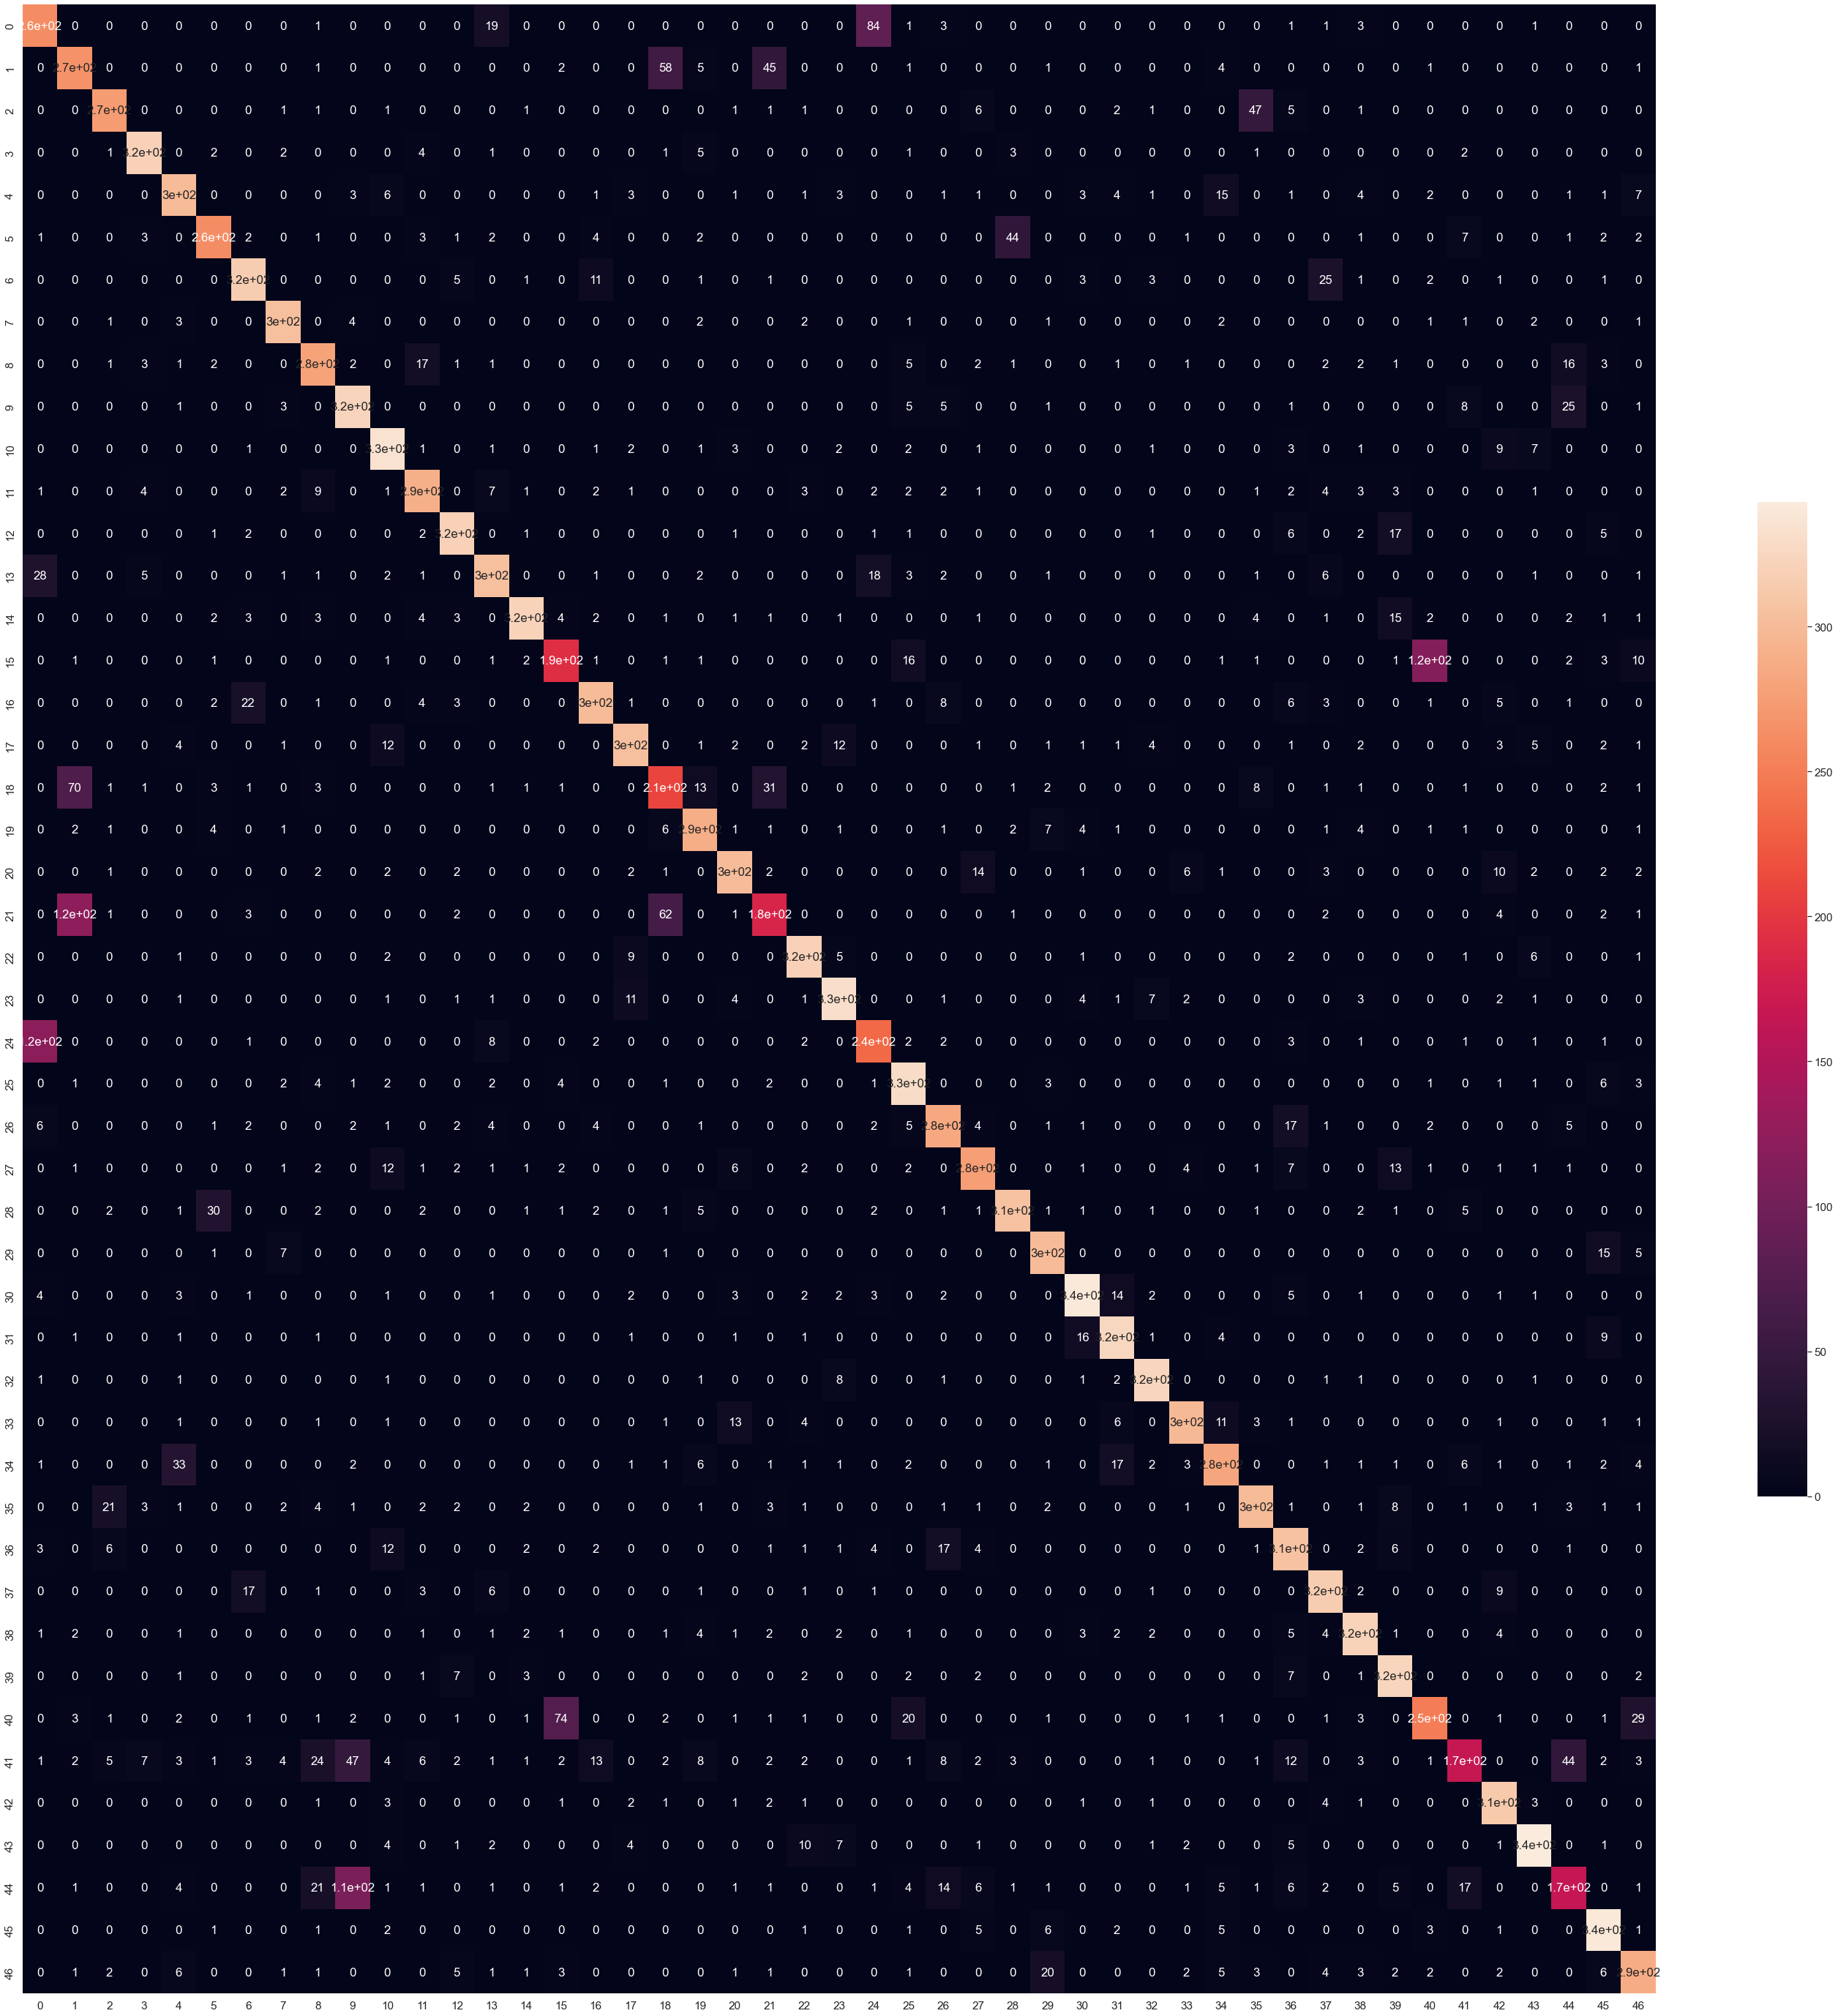

In [33]:
cf = confusion_matrix(y_test, y_pred_rf)
mask = np.triu(np.ones_like(cf, dtype=bool))
sns.set(font_scale=1.4) # for label size
plt.figure(figsize=(50,50))
sns.heatmap(cf , annot=True,cbar_kws={"shrink": .5}) # font size

In [28]:
print('RF Train Score is : ' , clf_rf.score(X_train, y_train))
print('RF Test Score is : ' , clf_rf.score(X_test, y_test))

RF Train Score is :  0.9670838548185231
RF Test Score is :  0.8031323877068558


In [30]:
print(classification_report(y_pred_rf , y_test))

              precision    recall  f1-score   support

           0       0.71      0.62      0.66       433
           1       0.68      0.55      0.61       476
           2       0.79      0.86      0.83       315
           3       0.92      0.91      0.91       346
           4       0.82      0.82      0.82       357
           5       0.76      0.84      0.80       306
           6       0.85      0.86      0.85       365
           7       0.93      0.89      0.91       337
           8       0.81      0.76      0.78       368
           9       0.85      0.65      0.73       487
          10       0.91      0.80      0.85       420
          11       0.85      0.84      0.84       345
          12       0.89      0.89      0.89       360
          13       0.80      0.84      0.82       358
          14       0.85      0.93      0.89       341
          15       0.56      0.68      0.62       288
          16       0.83      0.85      0.84       352
          17       0.85    

Predicted N


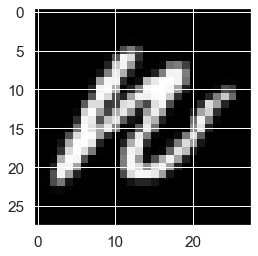

In [36]:
index= 2876

print("Predicted " + label_dictionary[(y_pred_rf[index])])
im = X_test[index]
im = rotate(im)
im = rotate(im)
plt.imshow(im , cmap=plt.cm.gray)

#### Saving the model

In [50]:
# pk.dump(clf_rf , open('Models/rf_clf.sav','wb'))

In [12]:
RF_saved = pk.load(open('Models/rf_clf.sav','rb'))

## Decision tree model

#### Building , fitting model

In [38]:
dtc = DecisionTreeClassifier( max_depth = 14
                             ,max_features=650)

In [39]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=14, max_features=650)

#### evaluating the model

In [40]:
y_pred_dt =dtc.predict(X_test)

In [41]:
f1_score(y_pred_dt,y_test , average='weighted')

0.603338911640937

In [42]:
accuracy_score(y_pred_dt,y_test)

0.6023049645390071

In [43]:
cf = confusion_matrix(y_test, y_pred_dt)

<AxesSubplot:>

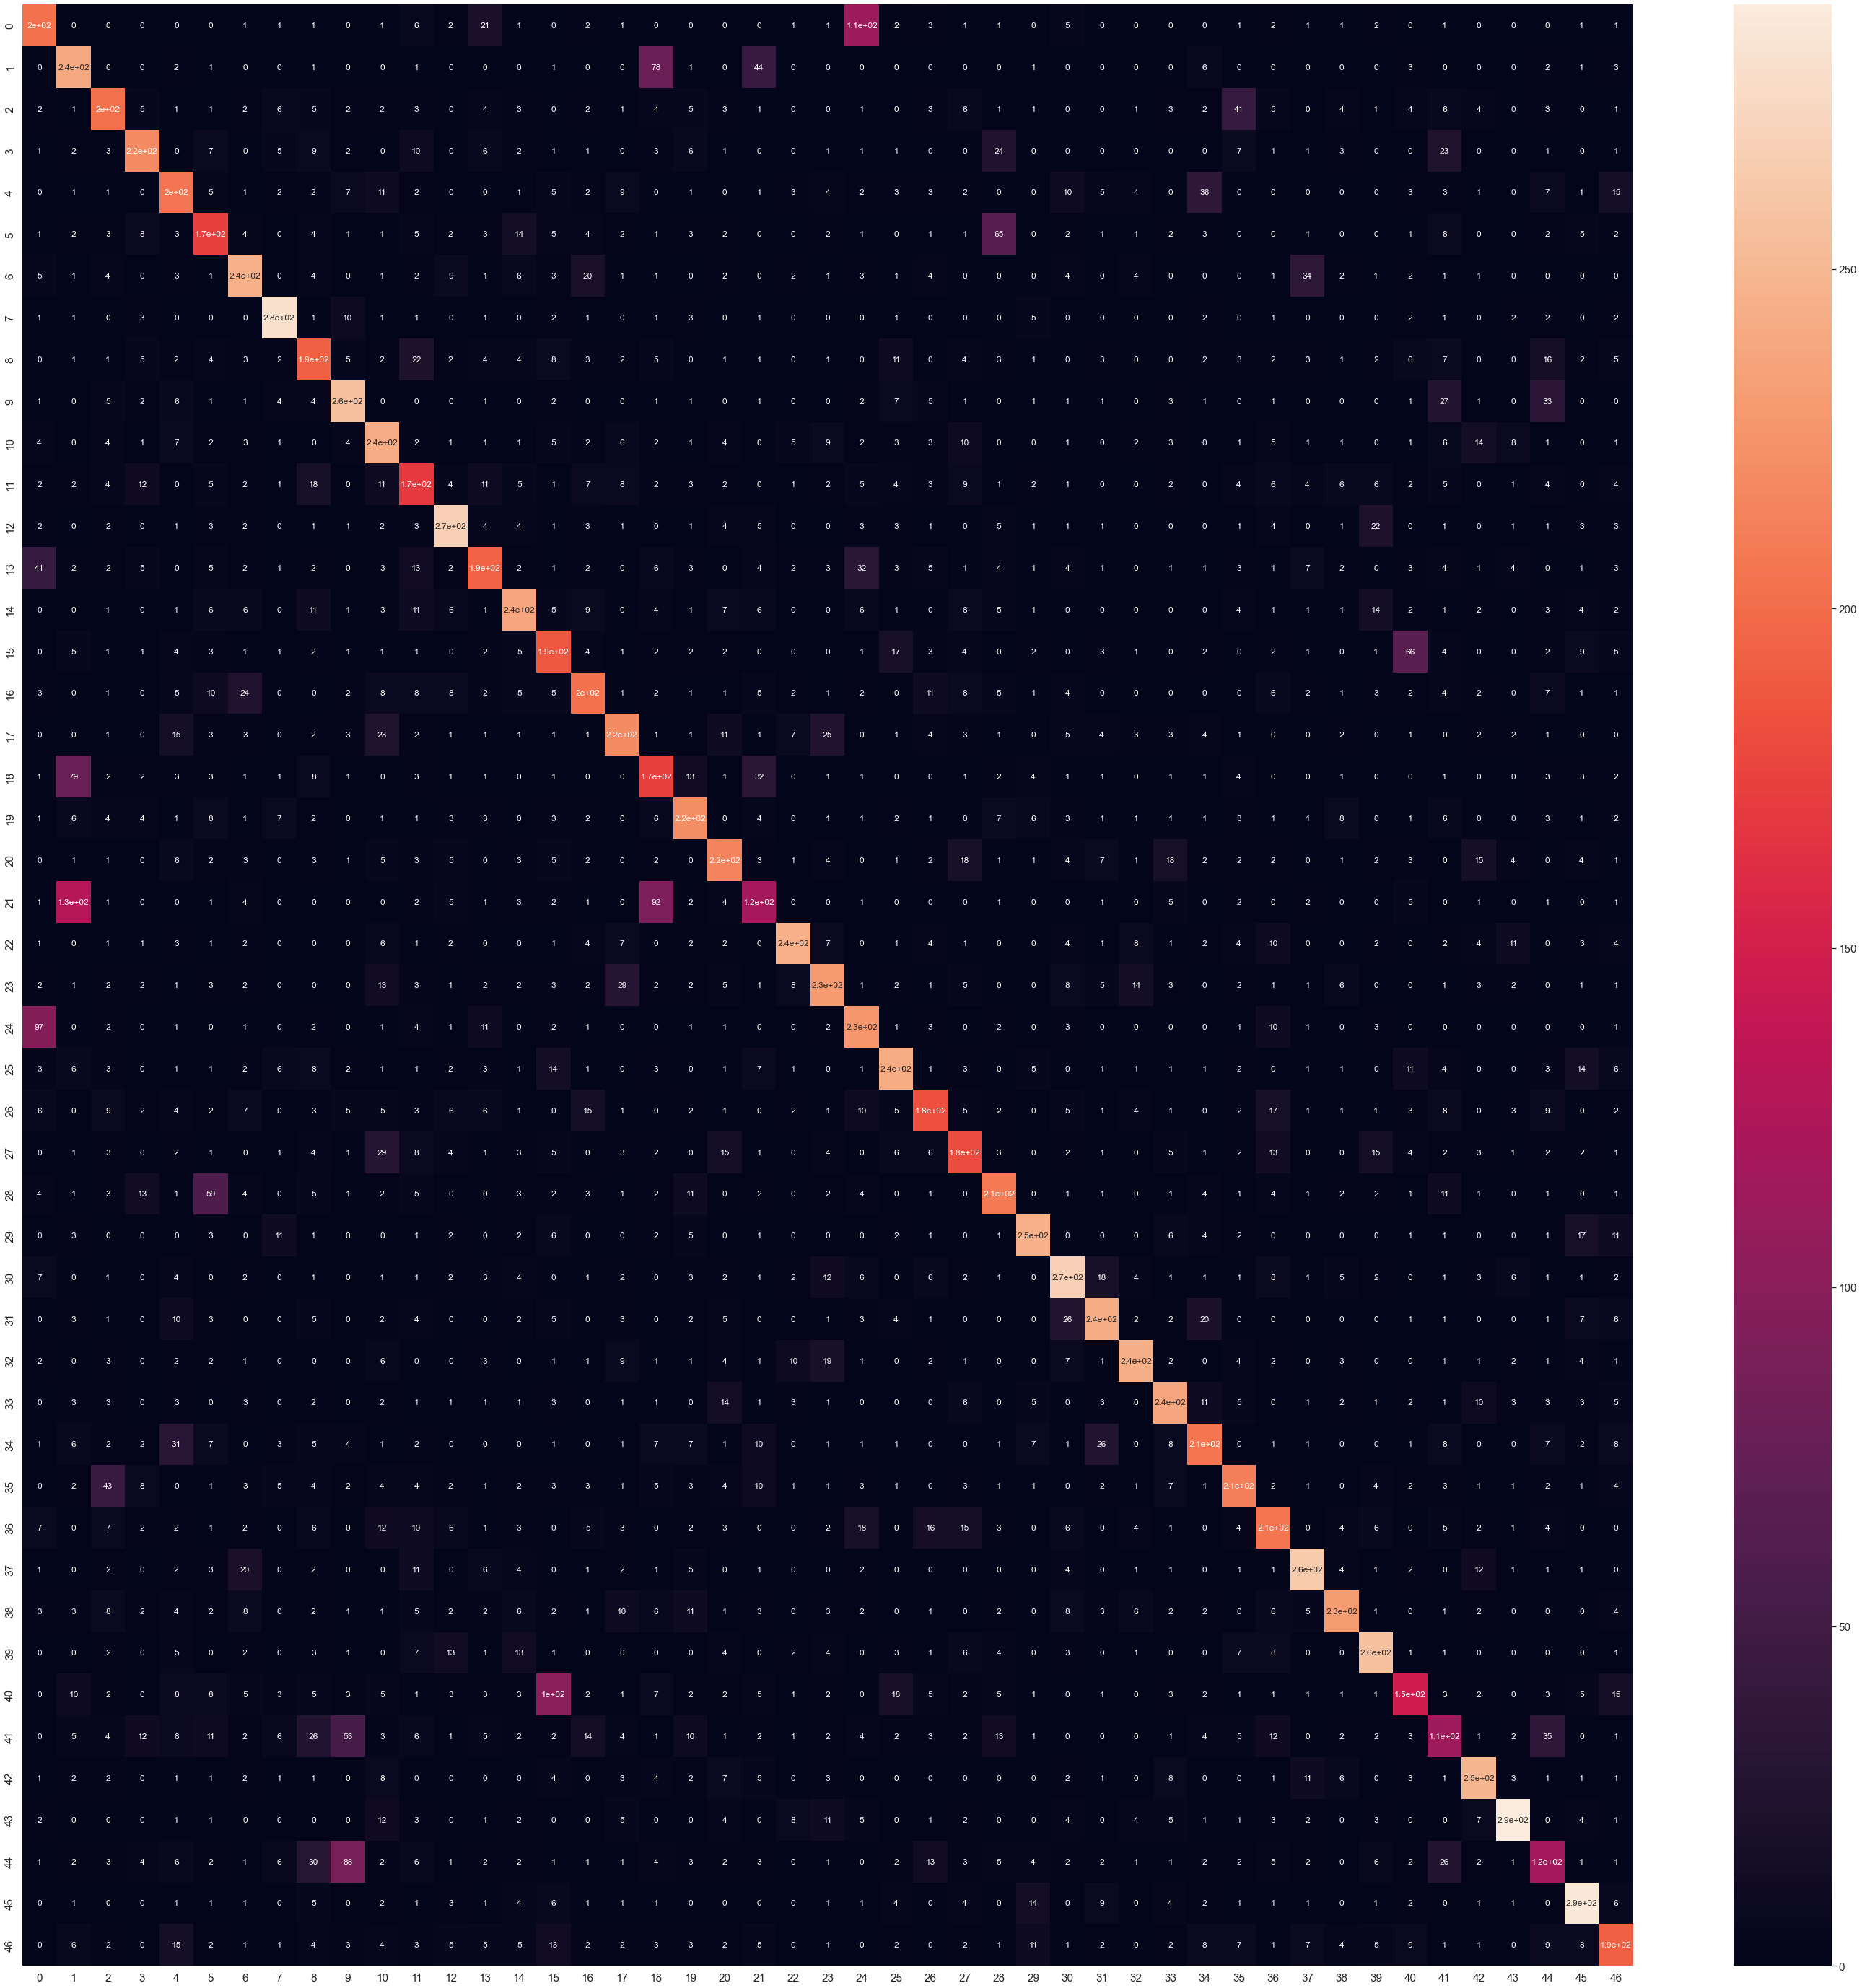

In [44]:
sns.set(font_scale=1.4) # for label size
plt.figure(figsize=(50,50))
sns.heatmap(cf, annot=True, annot_kws={"size": 12}) # font size

In [45]:
print(classification_report(y_pred_dt , y_test))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52       407
           1       0.62      0.46      0.53       527
           2       0.59      0.58      0.58       352
           3       0.64      0.70      0.67       316
           4       0.57      0.54      0.55       381
           5       0.51      0.48      0.50       359
           6       0.66      0.64      0.65       380
           7       0.86      0.79      0.82       355
           8       0.56      0.49      0.52       397
           9       0.69      0.56      0.62       462
          10       0.65      0.55      0.60       440
          11       0.50      0.47      0.48       362
          12       0.74      0.71      0.73       376
          13       0.51      0.61      0.56       320
          14       0.64      0.66      0.65       363
          15       0.54      0.45      0.49       420
          16       0.57      0.62      0.59       329
          17       0.61    

In [46]:
print('DT Train Score is : ' , dtc.score(X_train, y_train))
print('DT Test Score is : ' , dtc.score(X_test, y_test))

DT Train Score is :  0.7974864413850646
DT Test Score is :  0.6023049645390071


Predicted 7


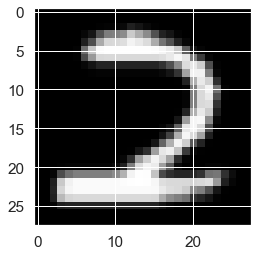

In [47]:
index= 188

print("Predicted " + label_dictionary[(y_pred_dt[index])])
im = X_test[index]
im = rotate(im)
im = rotate(im)
plt.imshow(im , cmap=plt.cm.gray)

#### Saving the model

In [49]:
# pk.dump(dtc , open('Models/dt_clf.sav','wb'))

In [13]:
DT_saved = pk.load(open('Models/dt_clf.sav','rb'))

#### Reading test dataset

In [35]:
t_df = pd.read_csv("Data/test.csv" , header= None)

In [36]:
t_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,76,125,114,45,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,151,215,203,121,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,156,245,253,213,37,0,0,0,0,0,0,0,0,0,0,0,2,4,4,4,0,0,0,0,0,0,0,1,36,177,252,217,37,0,0,0,0,0,0,0,0,0,7,46,82,125,127,113,32,0,0,0,0,0,0,0,5,129,250,217,37,0,0,0,0,0,0,0,18,38,95,207,232,249,250,242,126,8,0,0,0,0,0,0,11,141,250,217,37,0,0,0,0,0,1,23,126,214,234,251,250,250,252,253,202,32,0,0,0,0,0,6,80,220,254,217,37,0,0,0,0,1,35,159,234,253,251,189,145,129,191,250,173,21,0,0,0,8,33,115,189,251,254,203,32,0,0,0,0,7,90,218,251,252,242,132,64,41,146,247,15

In [37]:
X_t = t_df.iloc[:,1:]

y_t = t_df.loc[:,0]

In [38]:
X_t = np.asarray(X_t)
X_t = np.apply_along_axis(rotate, 1, X_t)
X_t = X_t.reshape((X_t.shape[0],784))

In [40]:
X_t.shape

(18800, 784)

### Decision Tree for all test dataset

In [42]:
dt_pred = DT_saved.predict(X_t)

In [43]:
dt_pred

array([46, 14,  9, ...,  1, 26, 29], dtype=int64)

In [44]:
accuracy_score(dt_pred , y_t)

0.5912765957446808

### Random forest for all test dataset

In [47]:
RF_pred = RF_saved.predict(X_t)

In [49]:
accuracy_score(RF_pred , y_t)

0.8004787234042553

In [96]:
a1 , a2 = compare_2_arrays(RF_pred , np.array(y_t))

In [142]:
a1 , a2

(array(['9', 'A', '6', ..., 'D', 'O', 'L'], dtype='<U11'),
 array(['q', 'B', 'C', ..., 'O', '0', '1'], dtype='<U11'))

In [129]:
df_values = pd.DataFrame(a1,a2).reset_index().rename(columns= {"index":"pred" , 0:"true"})

In [132]:
df_values =df_values.groupby("pred").value_counts().sort_values(ascending=False)

In [136]:
df_values = pd.DataFrame(df_values , columns=[""]).head(50)

In [139]:
df_values

,,
pred,true,
F,f,143
L,1,130
q,9,122
O,0,114
I,1,83
0,O,80
f,F,75
1,I,71
L,I,60
